In [64]:
import numpy as np
import pandas as pd

import geopy.distance

from sklearn import linear_model, metrics

import matplotlib.pyplot as plt
import seaborn as sns

from utils.PreProcessor import PreProcessor

# Loading Datasets

In [65]:
# %time preprocessor = PreProcessor(sample_num = 1, preprocess_all_raw_data = True)

In [66]:
%time preprocessor = PreProcessor(sample_num = 1, preprocess_all_raw_data = False)

**************************************
Loading PreProcessed Datasets
Loaded AirRouteDatasets
Loaded Domestic Passenger Data
Loaded Indian Railways Data
Loaded Socio-Economic Data
Loaded Monument Visitors Data
**************************************
CPU times: user 37.1 ms, sys: 382 µs, total: 37.4 ms
Wall time: 36.7 ms


# Checking Data

## Air Route Data

In [67]:
preprocessor.city_mapping.head()

,City,AirRouteData_AirportCode,DomesticPassengerTraffic_City,EconomicData_District,StationCodeData_District,Airport_City_Coords,EducationData_District,PopulationAreaHousehold_District,LatestPopulation_City,PopulationHistory_District
0,Ahmedabad,AMD,AHMEDABAD,NaN,Ahmadabad,"23.073702560470423, 72.62711816841471",AHMADABAD,Ahmadabad,Ahmedabad,ahmadabad
1,Bengaluru,BLR,BENGALURU,{BANGALORE URBAN + BANGALORE RURAL},Bangalore Urban,"13.199253589160458, 77.70610499457639",{BANGALORE + BANGALORE RURAL},{Bangalore + Bangalore Rural},Bengaluru,{bangalore + bangalore rural}
2,Mumbai,BOM,MUMBAI,MUMBAI,Greater Bombay,"19.099282513860523, 72.87502185672862",{MUMBAI + MUMBAI SUBURBAN},{Mumbai Suburban + Mumbai},{Mumbai + Navi Mumbai},{mumbai suburban + mumbai}
3,Pune,PNQ,PUNE,PUNE,Pune,"18.57956672029852, 73.90948542603986",PUNE,Pune,Pune,pune
4,Chennai,MAA,CHENNAI,CHENNAI,Chennai,"12.994341981037747, 80.17159635853399",CHENNAI,Chennai,Chennai,chennai


In [68]:
preprocessor.all_network_data.head()

,From,To,Distance,Time,Cheapest Price,Aircraft Type,Number of Flights
0,AMD,IXC,583,105,59,Narrow Body,5.0
1,AMD,DED,598,110,103,Narrow Body,1.0
2,AMD,DEL,469,95,48,Narrow Body,24.0
3,AMD,JAI,326,80,53,Narrow Body,1.0
4,AMD,LKO,575,105,69,Narrow Body,4.0


In [69]:
preprocessor.all_airport_data.head()

,City/Town,Name,Airport Traffic Level
0,Ahmedabad,AMD,1
1,Bhuj,BHJ,3
2,Jaisalmer,JSA,3
3,Jodhpur,JDH,2
4,Jammu,IXJ,3


In [70]:
preprocessor.network_data.head()

,From,To
0,COK,BLR
1,COK,DEL
2,MAA,BLR
3,MAA,HYD
4,MAA,GAU


## Domestic Traffic Data

In [71]:
preprocessor.total_domestic_data.head()

,Route,FROM,TO,PASSENGERS,FREIGHT,MAIL,DAYS
0,AGARTALA-AHMEDABAD,AGARTALA,AHMEDABAD,3038.0,52.357,0.0,365
1,AGARTALA-AIZAWL,AGARTALA,AIZAWL,5780.0,0.087,0.0,365
2,AGARTALA-BENGALURU,AGARTALA,BENGALURU,44195.0,367.947,0.0,365
3,AGARTALA-BHUBANESWAR,AGARTALA,BHUBANESWAR,18.0,0.000,0.0,61
4,AGARTALA-CHENNAI,AGARTALA,CHENNAI,12767.0,0.000,0.0,304


## Railways Data

In [72]:
preprocessor.all_station_districts_data.head()

,StationCode,District,State
0,BDHL,Jaipur,Rajasthan
1,KHH,Bareilly,Uttar Pradesh
2,SRKN,Hanumangarh,Rajasthan
3,BKKA,Hanumangarh,Rajasthan
4,NHR,Hanumangarh,Rajasthan


In [73]:
preprocessor.city_to_city_train_dict['Greater Bombay']['Pune']

[{'duration': 184.38666666671634,
  'train_num': '11017',
  'third_ac': 1,
  'chair_car': 0,
  'first_class': 0,
  'sleeper': 1,
  'second_ac': 1,
  'type': 'Exp',
  'first_ac': 0},
 {'duration': 209.31081081181765,
  'train_num': '11019',
  'third_ac': 1,
  'chair_car': 0,
  'first_class': 0,
  'sleeper': 1,
  'second_ac': 1,
  'type': 'Exp',
  'first_ac': 0},
 {'duration': 202.9632432423532,
  'train_num': '11023',
  'third_ac': 1,
  'chair_car': 0,
  'first_class': 0,
  'sleeper': 1,
  'second_ac': 1,
  'type': 'Exp',
  'first_ac': 0},
 {'duration': 185.25396825373173,
  'train_num': '11025',
  'third_ac': 0,
  'chair_car': 1,
  'first_class': 0,
  'sleeper': 0,
  'second_ac': 0,
  'type': 'Exp',
  'first_ac': 0},
 {'duration': 200.63416988402605,
  'train_num': '11027',
  'third_ac': 1,
  'chair_car': 0,
  'first_class': 0,
  'sleeper': 1,
  'second_ac': 1,
  'type': 'Mail',
  'first_ac': 0},
 {'duration': 199.4989189170301,
  'train_num': '11029',
  'third_ac': 0,
  'chair_car': 1

## Economic Data

In [74]:
preprocessor.economic_data.head()

,State,District,Year,GDP
0,AndhraPradesh,ADILABAD,1999-00,3463.28
1,AndhraPradesh,ADILABAD,2000-01,3742.69
2,AndhraPradesh,ADILABAD,2001-02,4209.40
3,AndhraPradesh,ADILABAD,2002-03,4099.29
4,AndhraPradesh,ADILABAD,2003-04,4781.85


## Population/Household/Area Data

In [75]:
preprocessor.pop_area_household_data.head()

,IsDistrict,District,IsTotal,InhabitedVillages,UninhabitedVillages,Towns,Households,Population,MalePopulation,FemalePopulation,Area,PopulationPerSqKm
0,DISTRICT,Kupwara,Total,353.0,9.0,10.0,113929.0,870354.0,474190.0,396164.0,2379.0,366.0
1,DISTRICT,Badgam,Total,462.0,12.0,9.0,103363.0,753745.0,398041.0,355704.0,1361.0,554.0
2,DISTRICT,Leh(Ladakh),Total,111.0,1.0,3.0,21909.0,133487.0,78971.0,54516.0,45110.0,3.0
3,DISTRICT,Kargil,Total,125.0,2.0,1.0,18338.0,140802.0,77785.0,63017.0,14036.0,10.0
4,DISTRICT,Punch,Total,170.0,8.0,3.0,90261.0,476835.0,251899.0,224936.0,1674.0,285.0


In [76]:
preprocessor.latest_population_data.head()

,city,pop2023,latitude,longitude
0,Mumbai,12691836,19.0728,72.8826
1,Delhi,10927986,28.6520,77.2315
2,Bengaluru,8443675,12.9719,77.5937
3,Hyderabad,6809970,17.3841,78.4564
4,Ahmedabad,6357693,23.0258,72.5873


In [77]:
preprocessor.population_history_data['ambala']

{'state': 'haryana',
 'history': {'1901': [330735, 183117, 147618],
  '1911': [277417, 158247, 119170],
  '1921': [258229, 145369, 112860],
  '1931': [297802, 166867, 130935],
  '1941': [339882, 189129, 150753],
  '1951': [365383, 202179, 163204],
  '1961': [453581, 248197, 205384],
  '1971': [539297, 286542, 252755],
  '1981': [659385, 346763, 312622],
  '1991': [806482, 423721, 382761],
  '2001': [1014411, 542977, 471434],
  '2011': [1128350, 598703, 529647]}}

## Education Data

In [78]:
preprocessor.education_data.head()

,15-19_TotalPopulation,15-19_TotalMalePopulation,15-19_TotalFemalePopulation,15-19_Graduates,15-19_MaleGraduates,15-19_FemaleGraduates,20-24_TotalPopulation,20-24_TotalMalePopulation,20-24_TotalFemalePopulation,20-24_Graduates,...,35-59_FemaleGraduates,60+_TotalPopulation,60+_TotalMalePopulation,60+_TotalFemalePopulation,60+_Graduates,60+_MaleGraduates,60+_FemaleGraduates,District,State,Year
0,34278,18621,15657,0,0,0,34369,18906,15463,2244,...,1564,14947,8525,6422,227,183,44,ANDAMANS,ANDAMAN NICOBAR ISLANDS,2001
1,4170,2180,1990,0,0,0,3921,2050,1871,75,...,45,2419,1309,1110,6,6,0,NICOBARS,ANDAMAN NICOBAR ISLANDS,2001
2,2773,1536,1237,0,0,0,3544,2143,1401,125,...,68,2650,1447,1203,12,12,0,NICOBARS,ANDAMAN NICOBAR ISLANDS,2011
3,9374,4845,4529,0,0,0,9386,4504,4882,416,...,594,9017,5039,3978,60,54,6,NORTH MIDDLE ANDAMAN,ANDAMAN NICOBAR ISLANDS,2011
4,20879,10885,9994,0,0,0,24185,12881,11304,2796,...,3265,13757,7703,6054,472,370,102,SOUTH ANDAMAN,ANDAMAN NICOBAR ISLANDS,2011


## Tourism Data

In [79]:
preprocessor.monument_visitors_data.head()

,City,NumMonuments2020,NumMonuments2022,Domestic2019-20,Domestic2020-21,Domestic2021-22,Foreign2019-20,Foreign2020-21,Foreign2021-22,Domestic2018-19,Foreign2018-19
0,Agra,9.0,9.0,7632914.0,2061695.0,5209587.0,1394635.0,14099.0,60086.0,9525738.0,1826587.0
1,Aurangabad,6.0,6.0,3545221.0,555097.0,1293929.0,56402.0,409.0,2673.0,3764094.0,73773.0
2,Bangalore,4.0,4.0,1420289.0,336796.0,529404.0,34483.0,1069.0,3348.0,1566190.0,41835.0
3,Bhopal,14.0,11.0,1953517.0,634016.0,1271045.0,61743.0,496.0,853.0,2033017.0,105201.0
4,Bhubaneswar,6.0,5.0,2404593.0,651825.0,824707.0,9249.0,230.0,777.0,2648793.0,7945.0


In [80]:
preprocessor.tourist_loc_coords_data.head()

,City,Latitude,Longitude
0,Agra,27.179822,78.010567
1,Aurangabad,19.880102,75.343481
2,Bangalore,12.980725,77.589045
3,Bhopal,23.265015,77.411382
4,Bhubaneswar,20.296040,85.828691


# Fetching Data for Tier-I/II Cities

In [81]:
tier_1_2_cities = preprocessor.city_mapping['City'].values
print(len(tier_1_2_cities))
print(tier_1_2_cities)

22
['Ahmedabad' 'Bengaluru' 'Mumbai' 'Pune' 'Chennai' 'Hyderabad' 'Kolkata'
 'Delhi' 'Visakhapatnam' 'Guwahati' 'Patna' 'Raipur' 'Gurugram' 'Shimla'
 'Jamshedpur' 'Thiruvananthapuram' 'Bhopal' 'Bhubaneswar' 'Amritsar'
 'Jaipur' 'Lucknow' 'Dehradun']


## Economic Data Features

In [82]:
def get_economic_data(cities):
    city_to_district_economic_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EconomicData_District']))
    cities_latest_gdps = []
    cities_gdp_history = []
    for city in cities:
        district = city_to_district_economic_data_mapping[city]
        if(pd.isnull(district)):
            cities_latest_gdps.append(np.nan)
            cities_gdp_history.append([])
        else:
            if(district.startswith('{')):
                districts = district[1:-1]
                districts = districts.split(' + ')
                has_district = pd.Series([False] * preprocessor.economic_data.shape[0])
                for district in districts:
                    has_district = has_district | (preprocessor.economic_data['District'] == district)
                city_economic_data = preprocessor.economic_data[has_district]
                city_economic_data = city_economic_data.groupby(['Year'])[['GDP']].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})
                city_economic_data['State'] = pd.Series([''] * city_economic_data.shape[0])
                city_economic_data['District'] = pd.Series([''] * city_economic_data.shape[0])
            else:
                city_economic_data = preprocessor.economic_data[preprocessor.economic_data['District'] == district]
            city_economic_data = city_economic_data.sort_values("Year")
            city_latest_gdp = city_economic_data.iloc[city_economic_data.shape[0] - 1]['GDP']
            cities_latest_gdps.append(city_latest_gdp)
            city_gdp_history = city_economic_data['GDP'].values
            cities_gdp_history.append(city_gdp_history)
    economic_data = pd.DataFrame([cities, cities_latest_gdps, cities_gdp_history], index = ['City', 'GDP_latest', 'GDP_history']).transpose().reset_index(drop = True)
    for col in economic_data.columns[1:-1]:
        economic_data[col] = economic_data[col].fillna(np.nanmean(economic_data[col].values))
    return economic_data

economic_data = get_economic_data(tier_1_2_cities)
# print(pd.isnull(economic_data).sum())
# print(economic_data.info())
economic_data.head()

,City,GDP_latest,GDP_history
0,Ahmedabad,31983.970872,[]
1,Bengaluru,94112.000000,"[25139.5, 25586.379999999997, 30327.41, 32104...."
2,Mumbai,191910.000000,"[54374.09, 52122.34, 55800.05, 59536.03, 65657..."
3,Pune,93562.000000,"[27231.84, 26229.79, 26871.17, 29131.93, 32026..."
4,Chennai,16670.560000,"[13215.12, 12725.53, 12460.29, 12812.12, 13831..."


## Tourism Data Features

In [83]:
def get_tourism_data(cities):
    
    def distance_factor(miles):
        return np.exp(miles / (-200))
    
    def closest_node(node, nodes):
        dist = np.sum((nodes - node)**2, axis=1)
        return np.argmin(dist)
    
    all_cities_coords = preprocessor.city_mapping['Airport_City_Coords']
    all_cities_coords_lat = all_cities_coords.apply(lambda x: float(x.split(',')[0])).values
    all_cities_coords_lon = all_cities_coords.apply(lambda x: float(x.split(',')[1])).values
    all_cities_coords = np.asarray(list(zip(all_cities_coords_lat, all_cities_coords_lon)))
    
    all_cities_tourism_dict = {}
    
    for idx, row in preprocessor.tourist_loc_coords_data.iterrows():
        tourist_loc_coord = np.asarray([row['Latitude'], row['Longitude']])
        closest_idx = closest_node(tourist_loc_coord, all_cities_coords)
        closest_city = cities[closest_idx]
        closest_coord = all_cities_coords[closest_idx]
        closest_dist = geopy.distance.geodesic(tourist_loc_coord, closest_coord).miles
        factor = distance_factor(closest_dist)
        tourism_data = preprocessor.monument_visitors_data.loc[idx].values
        if(closest_city in all_cities_tourism_dict):
            all_cities_tourism_dict[closest_city] += tourism_data[1:] * factor
        else:
            all_cities_tourism_dict[closest_city] = tourism_data[1:] * factor
    tourism_data = pd.DataFrame.from_dict(all_cities_tourism_dict, orient = 'index', columns = preprocessor.monument_visitors_data.columns[1:]).reset_index(drop = False).rename({'index': 'City'}, axis = 1)
    tourism_data['Domestic_history'] = tourism_data.apply(lambda x: [x['Domestic2018-19'], x['Domestic2019-20'], x['Domestic2020-21'], x['Domestic2021-22']], axis = 1)
    tourism_data['Foreign_history'] = tourism_data.apply(lambda x: [x['Foreign2018-19'], x['Foreign2019-20'], x['Foreign2020-21'], x['Foreign2021-22']], axis = 1)
    tourism_data['NumMonumentsChange'] = tourism_data['NumMonuments2022'] - tourism_data['NumMonuments2020']
    tourism_data.drop(['Domestic2018-19', 'Domestic2019-20', 'Domestic2020-21', 'Foreign2018-19', 'Foreign2019-20', 'Foreign2020-21', 'NumMonuments2020'], axis = 1, inplace = True)
    tourism_data = tourism_data.rename({'Domestic2021-22': 'Domestic_latest', 'Foreign2021-22': 'Foreign_latest', 'NumMonuments2022': 'NumMonuments_latest', 'NumMonumentsChange': 'NumMonumentsChange_latest'}, axis = 1)
    return tourism_data
    
tourism_data = get_tourism_data(tier_1_2_cities)
# print(pd.isnull(tourism_data).sum())
# print(tourism_data.info())
tourism_data.head()

,City,NumMonuments_latest,Domestic_latest,Foreign_latest,Domestic_history,Foreign_history,NumMonumentsChange_latest
0,Gurugram,5.273227,3.052370e+06,35205.232615,"[5581263.890444819, 4472231.682948945, 1207976...","[1070223.017456068, 817136.2644921065, 8260.80...",0.000000
1,Pune,5.419323,1.241964e+06,2055.277359,"[2638435.233867787, 2726149.953568459, 652926....","[45222.65569886421, 38111.23237784556, 465.037...",0.000000
2,Bengaluru,7.399579,7.634647e+05,15870.326209,"[1899249.0744411645, 1694442.7347260679, 48000...","[87796.23071819407, 67012.54615905805, 2056.04...",0.000000
3,Bhopal,13.742239,1.542882e+06,1284.662472,"[2522179.5496682227, 2326419.063822186, 803643...","[103534.42914879326, 60905.88983637198, 670.91...",-2.924396
4,Bhubaneswar,4.919839,8.114852e+05,764.543044,"[2606327.23850215, 2366042.281677579, 641374.8...","[7817.624823796945, 9100.718942139452, 226.312...",-0.983968


## Education Data Features

In [84]:
def get_education_data(cities):
    city_to_district_education_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EducationData_District']))
    cities_education_data = []
    for city in cities:
        city_to_district_map = city_to_district_education_data_mapping[city]
        district_education_history = np.zeros((preprocessor.education_data.shape[1] - 3, 3))
        if(city_to_district_map.startswith('{')):
            city_to_district_map = city_to_district_map[1:-1]
            districts_years = []
            if('1991' in city_to_district_map):
                dict_entries = city_to_district_map.split('\n')
                for entry in dict_entries:
                    year = int(entry.split(': ')[0])
                    entry = ': '.join(entry.split(': ')[1:])
                    if('State' in entry):
                        district = ""
                        state = entry.split('State: ')[1]
                    else:
                        district = entry
                        state = ""
                    districts_years.append([district, year, state])
            else:
                if('+' in city_to_district_map):
                    districts = city_to_district_map.split(' + ')
                    for district in districts:
                        districts_years.extend([(district, 1991, ''), (district, 2001, ''), (district, 2011, '')])
        else:
            district = city_to_district_map
            districts_years = [(district, 1991, ''), (district, 2001, ''), (district, 2011, '')]
        history = []
        years = [1991, 2001, 2011]
        for year_idx, (district, year, state) in enumerate(districts_years):
            if(state == ''):
                district_education_data = preprocessor.education_data[preprocessor.education_data['District'] == district]
            else:
                district_education_data = preprocessor.education_data[preprocessor.education_data['State'] == state]
                district_education_data = district_education_data.groupby('Year')[district_education_data.columns[:-3]].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})
                district_education_data['State'] = pd.Series([state] * district_education_data.shape[0])
                district_education_data['District'] = pd.Series([''] * district_education_data.shape[0])
                district_education_data = district_education_data[[*district_education_data.columns[1:]] + [district_education_data.columns[0]]]
            yearly_district_education_data = district_education_data[district_education_data['Year'] == year]
            if(yearly_district_education_data.shape[0] == 0):
                district_education_history[:, years.index(year)] = np.nan
                continue
            assert(yearly_district_education_data.shape[0] == 1)
            for col_idx, col in enumerate(yearly_district_education_data.columns[:-3]):
                district_education_history[col_idx, years.index(year)] += yearly_district_education_data.iloc[0][col]
        district_education_history = [*district_education_history]
        district_education_data = [city, *[x[2] for x in district_education_history]]
        cities_education_data.append(district_education_data + district_education_history)
    cities_education_data = pd.DataFrame(cities_education_data, columns = ['City'] + [x + "_latest" for x in preprocessor.education_data.columns[:-3]] + [x + '_history' for x in preprocessor.education_data.columns[:-3]])
    return cities_education_data

education_data = get_education_data(tier_1_2_cities)
# print(pd.isnull(education_data).sum().sum())
# print(education_data.info())
education_data.head()

,City,15-19_TotalPopulation_latest,15-19_TotalMalePopulation_latest,15-19_TotalFemalePopulation_latest,15-19_Graduates_latest,15-19_MaleGraduates_latest,15-19_FemaleGraduates_latest,20-24_TotalPopulation_latest,20-24_TotalMalePopulation_latest,20-24_TotalFemalePopulation_latest,...,35-59_TotalFemalePopulation_history,35-59_Graduates_history,35-59_MaleGraduates_history,35-59_FemaleGraduates_history,60+_TotalPopulation_history,60+_TotalMalePopulation_history,60+_TotalFemalePopulation_history,60+_Graduates_history,60+_MaleGraduates_history,60+_FemaleGraduates_history
0,Ahmedabad,679291.0,369754.0,309537.0,0.0,0.0,0.0,710749.0,369470.0,341279.0,...,"[496188.0, 704172.0, 990927.0]","[116280.0, 214961.0, 351273.0]","[86380.0, 143019.0, 209047.0]","[29900.0, 71942.0, 142226.0]","[271001.0, 385613.0, 577602.0]","[135162.0, 185733.0, 283813.0]","[135839.0, 199880.0, 293789.0]","[10270.0, 27561.0, 71327.0]","[9140.0, 21808.0, 52060.0]","[1130.0, 5753.0, 19267.0]"
1,Bengaluru,867093.0,447017.0,420076.0,0.0,0.0,0.0,1199120.0,621561.0,577559.0,...,"[657515.0, 1005355.0, 1374345.0]","[145004.0, 313081.0, 606891.0]","[109170.0, 210068.0, 373981.0]","[35834.0, 103013.0, 232910.0]","[414321.0, 578990.0, 823746.0]","[215520.0, 291265.0, 415813.0]","[198801.0, 287725.0, 407933.0]","[18451.0, 47327.0, 121843.0]","[16330.0, 38439.0, 88781.0]","[2121.0, 8888.0, 33062.0]"
2,Mumbai,1100379.0,613217.0,487162.0,0.0,0.0,0.0,1333546.0,761998.0,571548.0,...,"[nan, 1414950.0, 1725951.0]","[nan, 486700.0, 745199.0]","[nan, 288659.0, 404365.0]","[nan, 198041.0, 340834.0]","[nan, 778204.0, 1066319.0]","[nan, 385286.0, 530021.0]","[nan, 392918.0, 536298.0]","[nan, 83699.0, 163272.0]","[nan, 59679.0, 102709.0]","[nan, 24020.0, 60563.0]"
3,Pune,819364.0,438697.0,380667.0,0.0,0.0,0.0,1028019.0,537628.0,490391.0,...,"[614230.0, 855122.0, 1220044.0]","[97460.0, 207141.0, 420816.0]","[67540.0, 131466.0, 251582.0]","[29920.0, 75675.0, 169234.0]","[382246.0, 583449.0, 856466.0]","[191066.0, 280149.0, 418108.0]","[191180.0, 303300.0, 438358.0]","[13410.0, 32841.0, 81629.0]","[10420.0, 23313.0, 53323.0]","[2990.0, 9528.0, 28306.0]"
4,Chennai,365046.0,186453.0,178593.0,0.0,0.0,0.0,432978.0,210171.0,222807.0,...,"[nan, 559222.0, 729305.0]","[nan, 204421.0, 344716.0]","[nan, 133429.0, 203646.0]","[nan, 70992.0, 141070.0]","[nan, 350826.0, 457228.0]","[nan, 173462.0, 222031.0]","[nan, 177364.0, 235197.0]","[nan, 37145.0, 70028.0]","[nan, 29319.0, 51693.0]","[nan, 7826.0, 18335.0]"


## Population/Household/Area Data Features

In [85]:
def get_population_household_area_data(cities):
    city_to_district_pop_area_household_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationAreaHousehold_District']))
    pop_area_household_data = pd.DataFrame()
    for city in cities:
        district = city_to_district_pop_area_household_data_mapping[city]
        if(district.startswith('{')):
            districts = district[1:-1].split(' + ')
            has_district = pd.Series([False] * preprocessor.pop_area_household_data.shape[0])
            for district in districts:
                has_district = has_district | (preprocessor.pop_area_household_data['District'] == district)
            district_data = preprocessor.pop_area_household_data[has_district]
            district_data = district_data.drop(['IsDistrict', 'District', 'IsTotal'], axis = 1)
            district_data = pd.DataFrame([district_data.sum(axis = 0)], columns = district_data.columns)
            district_data['IsDistrict'] = pd.Series(['DISTRICT'] * district_data.shape[0])
            district_data['District'] = pd.Series([''] * district_data.shape[0])
            district_data['IsTotal'] = pd.Series(['Total'] * district_data.shape[0])
            district_data = district_data[[*district_data.columns[-3:]] + [*district_data.columns[:-3]]]
        else:
            district_data = preprocessor.pop_area_household_data[preprocessor.pop_area_household_data['District'] == district]
        assert(district_data.shape[0] == 1)
        district_data = pd.DataFrame(district_data.values[:, 3:], columns = [x + '_latest' for x in district_data.columns[3:]])
        district_data['City'] = pd.Series([city])
        pop_area_household_data = pd.concat([pop_area_household_data, district_data], axis = 0)
    pop_area_household_data = pop_area_household_data[[*pop_area_household_data.columns[-1:]] + [*pop_area_household_data.columns[:-1]]]
    return pop_area_household_data

pop_household_area_data = get_population_household_area_data(tier_1_2_cities)
# print(pd.isnull(pop_household_area_data).sum())
# print(pop_household_area_data.info())
pop_household_area_data.head()

,City,InhabitedVillages_latest,UninhabitedVillages_latest,Towns_latest,Households_latest,Population_latest,MalePopulation_latest,FemalePopulation_latest,Area_latest,PopulationPerSqKm_latest
0,Ahmedabad,506.0,6.0,13.0,1510134.0,7214225.0,3788051.0,3426174.0,8107.0,889.876033
0,Bengaluru,1519.0,120.0,23.0,2623124.0,10612474.0,5531833.0,5080641.0,4494.0,4812.0
0,Mumbai,0.0,0.0,1.0,2779943.0,12442373.0,6715931.0,5726442.0,603.0,40632.034789
0,Pune,1852.0,25.0,35.0,2151503.0,9429408.0,4924105.0,4505303.0,15643.0,602.787701
0,Chennai,0.0,0.0,1.0,1154982.0,4646732.0,2335844.0,2310888.0,175.0,26553.0


In [86]:
def get_latest_population_data(cities):
    city_to_city_latest_population_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['LatestPopulation_City']))
    latest_population_data = pd.DataFrame()
    for city in cities:
        mapped_city = city_to_city_latest_population_data_mapping[city]
        if(mapped_city.startswith('{')):
            mapped_cities = mapped_city[1:-1].split(' + ')
            has_city = pd.Series([False] * preprocessor.latest_population_data.shape[0])
            for mapped_city in mapped_cities:
                has_city = has_city | (preprocessor.latest_population_data['city'] == mapped_city)
            city_data = preprocessor.latest_population_data[has_city]
            city_data = city_data.drop(['latitude', 'longitude', 'city'], axis = 1)
            city_data = pd.DataFrame([city_data.sum(axis = 0)], columns = city_data.columns)
            city_data['City'] = pd.Series([''] * city_data.shape[0])
            city_data = city_data[[*city_data.columns[-1:]] + [*city_data.columns[:-1]]]
        else:
            city_data = preprocessor.latest_population_data[preprocessor.latest_population_data['city'] == mapped_city]
            city_data = city_data.drop(['latitude', 'longitude'], axis = 1)
        assert(city_data.shape[0] == 1)
        city_data = pd.DataFrame(city_data.values[:, 1:], columns = [x + '_latest' for x in city_data.columns[1:]])
        city_data['City'] = pd.Series([city])
        latest_population_data = pd.concat([latest_population_data, city_data], axis = 0)
    latest_population_data = latest_population_data[[*latest_population_data.columns[-1:]] + [*latest_population_data.columns[:-1]]]
    return latest_population_data

latest_population_data = get_latest_population_data(tier_1_2_cities)
# print(pd.isnull(latest_population_data).sum())
# print(latest_population_data.info())
latest_population_data.head()

,City,pop2023_latest
0,Ahmedabad,6357693
0,Bengaluru,8443675
0,Mumbai,15291836
0,Pune,3124458
0,Chennai,4681087


In [87]:
def get_population_history_data(cities):
    city_to_district_pop_history_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationHistory_District']))
    pop_history_data = pd.DataFrame()
    population_history_data = preprocessor.population_history_data.copy()
    for city in cities:
        district = city_to_district_pop_history_data_mapping[city]
        district_population_history_data = np.zeros((3, 12))
        if(district.startswith('{')):
            districts = district[1:-1].split(' + ')
            district_data = population_history_data[districts[0]]['history']
            for district in districts[1:]:
                next_district_data = preprocessor.population_history_data[district]['history']
                for year in np.arange(1901, 2012, 10):
                    if((str(int(year)) not in district_data) & (str(int(year)) in next_district_data)):
                        district_data[str(int(year))] = next_district_data[str(int(year))]
                    elif((str(int(year)) in district_data) & (str(int(year)) in next_district_data)):
                        for pop_type_idx in range(3):
                            district_data[str(int(year))][pop_type_idx] = district_data[str(int(year))][pop_type_idx] + next_district_data[str(int(year))][pop_type_idx]
        else:
            district_data = population_history_data[district]['history']
        for year_idx, year in enumerate(np.arange(1901, 2012, 10)):
            if(str(int(year)) in district_data):
                for pop_type_idx in range(3):
                    if((type(district_data[str(int(year))][pop_type_idx]) == str)):
                        if((district_data[str(int(year))][pop_type_idx].strip().startswith('N')) | (district_data[str(int(year))][pop_type_idx].strip().startswith('-'))):
                            district_population_history_data[pop_type_idx, year_idx] = np.nan
                        else:
                            print("ALERT!")
                            print(district_data[str(int(year))][pop_type_idx])
                    else:
                        district_population_history_data[pop_type_idx, year_idx] = district_data[str(int(year))][pop_type_idx]
            else:
                district_population_history_data[:, year_idx] = [np.nan] * 3
        district_population_history_data = pd.DataFrame([[list(x) for x in district_population_history_data]], columns = ['TotalPopulation_history', 'MalePopulation_history', 'FemalePopulation_history'])
        district_population_history_data['City'] = pd.Series([city])
        pop_history_data = pd.concat([pop_history_data, district_population_history_data], axis = 0)
    pop_history_data = pop_history_data[[*pop_history_data.columns[-1:]] + [*pop_history_data.columns[:-1]]]
    return pop_history_data

pop_history_data = get_population_history_data(tier_1_2_cities)
# print(pd.isnull(pop_history_data).sum())
# print(pop_history_data.info())
pop_history_data.head()

,City,TotalPopulation_history,MalePopulation_history,FemalePopulation_history
0,Ahmedabad,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267..."
0,Bengaluru,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908..."
0,Mumbai,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637..."
0,Pune,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699..."
0,Chennai,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411..."


## Airport Traffic Data Features

In [88]:
def get_airport_in_out_traffic_data(cities):
    city_to_airport_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['AirRouteData_AirportCode']))
    airport_in_out_traffic = []
    for city in cities:
        airport = city_to_airport_mapping[city]
        if(pd.isnull(airport) == True):
            airport_in_out_traffic.append([city, np.nan])
        else:
            airport_flights = preprocessor.all_network_data[(preprocessor.all_network_data['From'] == airport) | (preprocessor.all_network_data['To'] == airport)]
            in_out_traffic = airport_flights['Number of Flights'].sum()
            airport_in_out_traffic.append([city, in_out_traffic])
    airport_in_out_traffic_data = pd.DataFrame(airport_in_out_traffic, columns = ['City', 'In_Out_Traffic_target'])
    return airport_in_out_traffic_data

airport_traffic_data = get_airport_in_out_traffic_data(tier_1_2_cities)
airport_traffic_data.head()

,City,In_Out_Traffic_target
0,Ahmedabad,225.0
1,Bengaluru,574.0
2,Mumbai,642.0
3,Pune,209.0
4,Chennai,269.0


# Analyzing Current Demand

## Preparing data for Regression Model

In [140]:
all_datasets_list = [economic_data, tourism_data, education_data, pop_household_area_data, latest_population_data, pop_history_data, airport_traffic_data]
total_dataset = all_datasets_list[0]
for dataset in all_datasets_list[1:]:
    total_dataset = pd.merge(total_dataset, dataset, on = 'City')
print(total_dataset.shape)
total_dataset.head()

(19, 95)


,City,GDP_latest,GDP_history,NumMonuments_latest,Domestic_latest,Foreign_latest,Domestic_history,Foreign_history,NumMonumentsChange_latest,15-19_TotalPopulation_latest,...,Population_latest,MalePopulation_latest,FemalePopulation_latest,Area_latest,PopulationPerSqKm_latest,pop2023_latest,TotalPopulation_history,MalePopulation_history,FemalePopulation_history,In_Out_Traffic_target
0,Ahmedabad,31983.970872,[],4.497647,6.176451e+05,1034.766839,"[529858.8589545916, 775649.5177170208, 231038....","[8342.230808826265, 13514.593600339784, 395.94...",-2.186300,679291.0,...,7214225.0,3788051.0,3426174.0,8107.0,889.876033,6357693,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267...",225.0
1,Bengaluru,94112.000000,"[25139.5, 25586.379999999997, 30327.41, 32104....",7.399579,7.634647e+05,15870.326209,"[1899249.0744411645, 1694442.7347260679, 48000...","[87796.23071819407, 67012.54615905805, 2056.04...",0.000000,867093.0,...,10612474.0,5531833.0,5080641.0,4494.0,4812.0,8443675,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908...",574.0
2,Mumbai,191910.000000,"[54374.09, 52122.34, 55800.05, 59536.03, 65657...",12.949500,1.717863e+06,3050.105405,"[3866004.616992362, 3925831.308910557, 713578....","[77525.67063951552, 73085.98422793717, 512.999...",0.000000,1100379.0,...,12442373.0,6715931.0,5726442.0,603.0,40632.034789,15291836,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637...",642.0
3,Pune,93562.000000,"[27231.84, 26229.79, 26871.17, 29131.93, 32026...",5.419323,1.241964e+06,2055.277359,"[2638435.233867787, 2726149.953568459, 652926....","[45222.65569886421, 38111.23237784556, 465.037...",0.000000,819364.0,...,9429408.0,4924105.0,4505303.0,15643.0,602.787701,3124458,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699...",209.0
4,Chennai,16670.560000,"[13215.12, 12725.53, 12460.29, 12812.12, 13831...",2.866246,1.349007e+06,172974.102173,"[1324372.679207271, 1753773.5359318813, 947255...","[102847.58114857439, 60108.03712876588, 30845....",-5.732491,365046.0,...,4646732.0,2335844.0,2310888.0,175.0,26553.0,4681087,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411...",269.0


In [141]:
latest_features = [x for x in total_dataset.columns if x.endswith('_latest')]
history_features = [x for x in total_dataset.columns if x.endswith('_history')]
target_feature = [x for x in total_dataset.columns if x.endswith('_target')]
assert(len(latest_features) + len(history_features) + len(target_feature) + 1 == total_dataset.shape[1])

In [142]:
print(pd.isnull(total_dataset).sum().sum())
cols_standardization_vals = {}
for col_idx, col in enumerate(total_dataset.columns):
    if((col in target_feature) or (col in latest_features)):
        if(col in target_feature):
            to_drop_idx = pd.isnull(total_dataset[col])
            to_drop_idx = to_drop_idx[to_drop_idx == True].index
            total_dataset = total_dataset.drop(to_drop_idx, axis = 0)
        elif(col in latest_features):
            col_mean = np.nanmean(total_dataset[col].values)
            total_dataset[col] = total_dataset[col].fillna(col_mean)
        col_mean = total_dataset[col].mean()
        col_std = total_dataset[col].std()
        total_dataset[col] = (total_dataset[col] - col_mean) / (col_std + 1e-10)
        cols_standardization_vals[col] = {'mean': col_mean, 'std': col_std}
print(pd.isnull(total_dataset).sum().sum())
total_dataset.head()

2
0


,City,GDP_latest,GDP_history,NumMonuments_latest,Domestic_latest,Foreign_latest,Domestic_history,Foreign_history,NumMonumentsChange_latest,15-19_TotalPopulation_latest,...,Population_latest,MalePopulation_latest,FemalePopulation_latest,Area_latest,PopulationPerSqKm_latest,pop2023_latest,TotalPopulation_history,MalePopulation_history,FemalePopulation_history,In_Out_Traffic_target
0,Ahmedabad,-0.061248,[],-0.240314,-0.380210,-0.318831,"[529858.8589545916, 775649.5177170208, 231038....","[8342.230808826265, 13514.593600339784, 395.94...",-0.502251,0.412115,...,0.763314,0.762304,0.763380,0.895623,-0.519013,0.608577,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267...",-0.096349
1,Bengaluru,1.280416,"[25139.5, 25586.379999999997, 30327.41, 32104....",0.558734,-0.229643,0.055317,"[1899249.0744411645, 1694442.7347260679, 48000...","[87796.23071819407, 67012.54615905805, 2056.04...",0.741610,0.885898,...,1.768560,1.732159,1.807357,0.102483,-0.181068,1.115775,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908...",1.267946
2,Mumbai,3.392379,"[54374.09, 52122.34, 55800.05, 59536.03, 65657...",2.086907,0.755831,-0.268004,"[3866004.616992362, 3925831.308910557, 713578....","[77525.67063951552, 73085.98422793717, 512.999...",0.741610,1.474426,...,2.309868,2.390730,2.214861,-0.751685,2.905328,2.780878,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637...",1.533769
3,Pune,1.268539,"[27231.84, 26229.79, 26871.17, 29131.93, 32026...",0.013470,0.264436,-0.293094,"[2638435.233867787, 2726149.953568459, 652926....","[45222.65569886421, 38111.23237784556, 465.037...",0.741610,0.765488,...,1.418594,1.394154,1.444316,2.549956,-0.543750,-0.177570,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699...",-0.158896
4,Chennai,-0.391943,"[13215.12, 12725.53, 12460.29, 12812.12, 13831...",-0.689521,0.374965,4.017422,"[1324372.679207271, 1753773.5359318813, 947255...","[102847.58114857439, 60108.03712876588, 30845....",-2.519799,-0.380655,...,0.003816,-0.045383,0.059629,-0.845641,1.692223,0.200918,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411...",0.075654


In [144]:
data_X = total_dataset[latest_features].values
data_y = total_dataset[target_feature].values[:, 0]
data_X.shape, data_y.shape

((17, 51), (17,))

In [146]:
random_idx = np.arange(17)
np.random.shuffle(random_idx)
train_idx, test_idx = random_idx[:-3], random_idx[-3:]
train_X, test_X = data_X[train_idx], data_X[test_idx]
train_y, test_y = data_y[train_idx], data_y[test_idx]
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((14, 51), (3, 51), (14,), (3,))

## Analyzing Correlations

In [147]:
corr_coefs = []
for idx in range(len(latest_features)):
    corr = np.abs(np.corrcoef(data_X[:, idx], data_y)[0, 1])
    corr_coefs.append(corr)

/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Coefficients:  [0.5643350259723752, 0.47050837320195366, 0.7645712597966078, 0.13627188573146767, 0.04011881229394171, 0.8532533212679142, 0.8506985683252444, 0.8543581342535839, nan, nan, nan, 0.8880141724782669, 0.8877301624829474, 0.884454401243742, 0.9291415404278562, 0.9176341056571057, 0.9345559510689643, 0.898212244496511, 0.8970095094119195, 0.897049360340439, 0.9268090478240213, 0.9191955888767036, 0.9303623527998908, 0.9035235231330982, 0.904394393004865, 0.9011283241149658, 0.9371168632796308, 0.9254817267286043, 0.9436046369867371, 0.9041672270552505, 0.9117852158623161, 0.8940509970939773, 0.9600831626489088, 0.9554112719950076, 0.9553954220386097, 0.8393306062544449, 0.8512043054880226, 0.8249924475194372, 0.9467337613325676, 0.9508156492009818, 0.919925377703166, 0.34062205775413573, 0.19095670087271724, 0.43584630172352373, 0.2949885627853845, 0.2414817815021004, 0.25242550877746106, 0.22860376487641054, 0.3061392690454373, 0.4573687274722022, 0.8969262163422768]


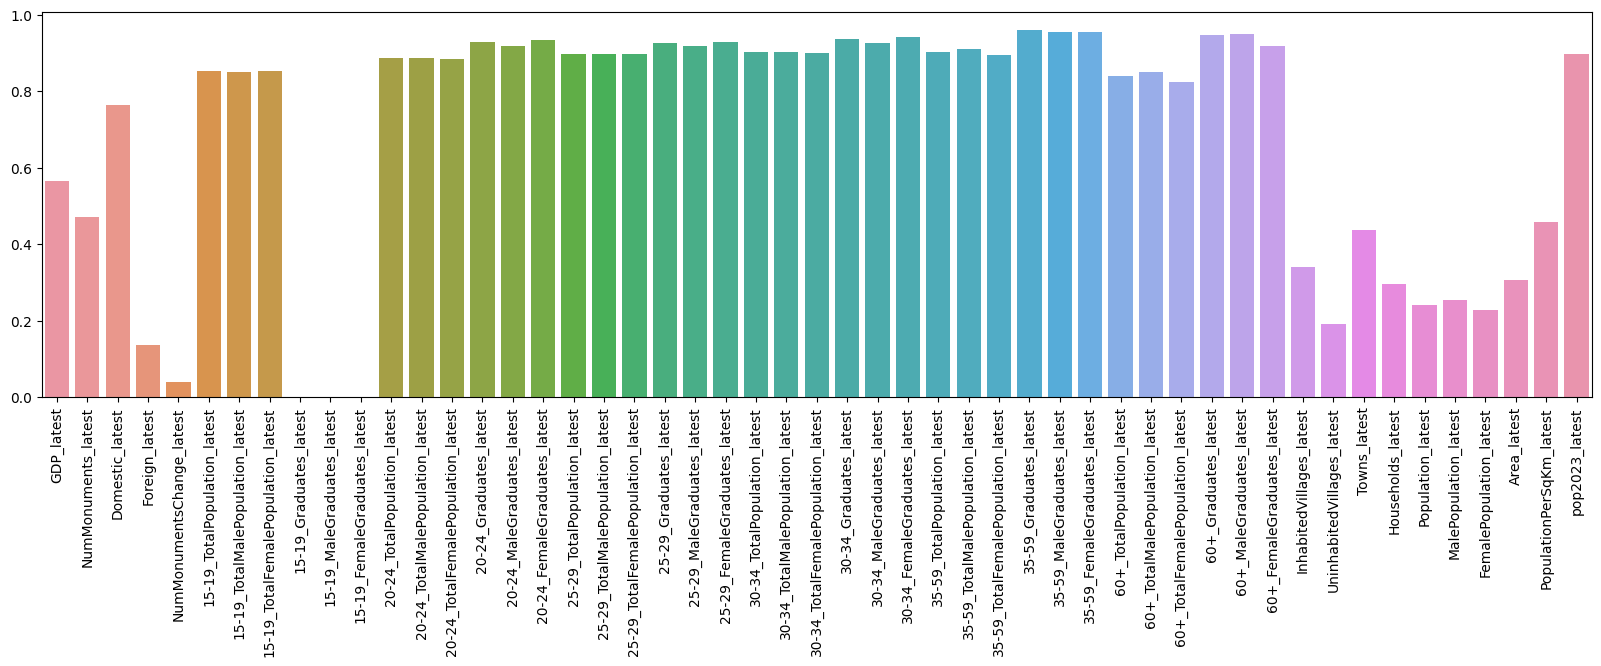

In [148]:
print('Coefficients: ', corr_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = latest_features, y = corr_coefs, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

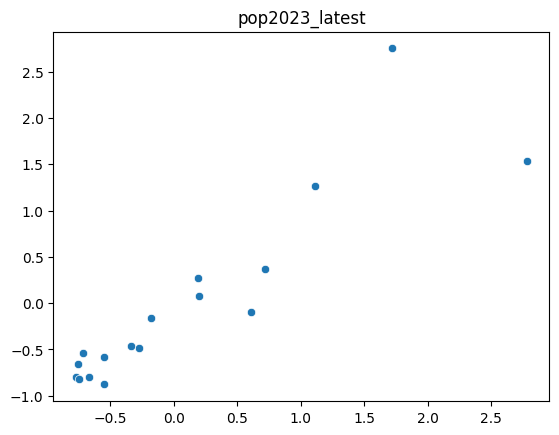

In [149]:
sns.scatterplot(x = data_X[:, -1], y = data_y)
plt.title(latest_features[-1])
plt.show()

## Training Linear Regression Model

In [150]:
model = linear_model.LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

Coefficients:  -0.010875277317647036


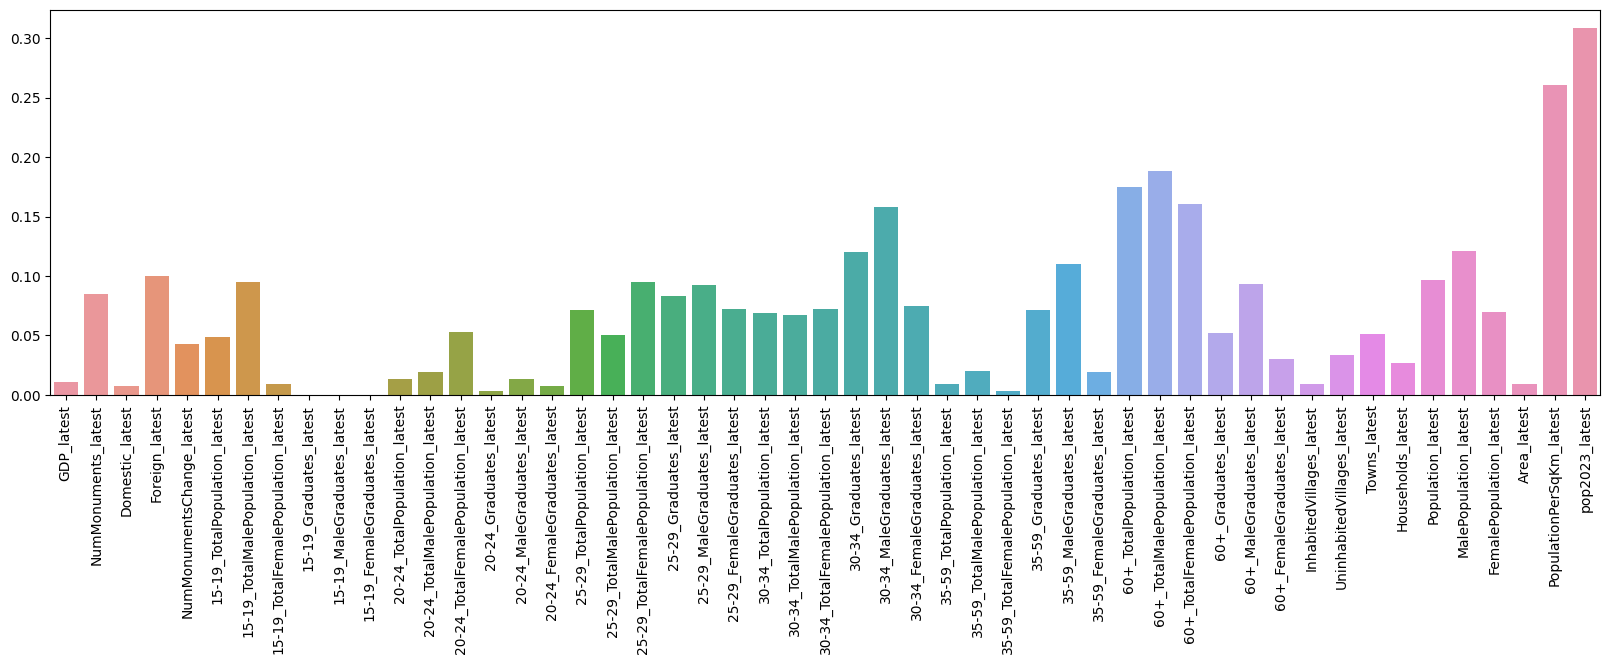

In [152]:
print('Coefficients: ', model.coef_[0])
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = latest_features, y = np.abs(model.coef_), ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [153]:
target_mean = cols_standardization_vals[target_feature[0]]['mean']
target_std = cols_standardization_vals[target_feature[0]]['std']
train_mse = np.sqrt(metrics.mean_squared_error(train_y * target_std + target_mean, model.predict(train_X) * target_std + target_mean))
test_mse = np.sqrt(metrics.mean_squared_error(test_y * target_std + target_mean, model.predict(test_X) * target_std + target_mean))
print(train_mse)
print(test_mse)

6.813169624276581e-13
44.32672563150762


In [157]:
test_y * target_std + target_mean

array([642., 225., 101.])

In [158]:
model.predict(test_X) * target_std + target_mean

array([662.61279874, 194.40699479,  33.66682559])

In [159]:
total_dataset[['City', target_feature[0]]].loc[test_idx]

,City,In_Out_Traffic_target
2,Mumbai,1.533769
0,Ahmedabad,-0.096349
9,Patna,-0.581084


In [139]:
train_X

array([[ 1.26853890e+00,  1.34698782e-02,  2.64436212e-01,
        -2.93093570e-01,  7.41610024e-01,  7.65488221e-01,
         7.35788287e-01,  8.00476502e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.02055542e+00,
         9.65896599e-01,  1.08218005e+00,  7.41558837e-01,
         7.17061435e-01,  7.62405584e-01,  1.00834730e+00,
         9.94475470e-01,  1.02155526e+00,  8.95735785e-01,
         9.22668235e-01,  8.63058464e-01,  9.41563970e-01,
         9.42229927e-01,  9.39313854e-01,  8.19022235e-01,
         8.60362970e-01,  7.64415306e-01,  8.64641143e-01,
         8.19230431e-01,  9.16214716e-01,  4.10126259e-01,
         4.32489585e-01,  3.76041940e-01,  1.26674447e+00,
         1.20907468e+00,  1.32050527e+00,  2.94899389e-01,
         2.11712199e-01,  4.51028986e-01,  1.15825523e+00,
        -2.96624984e-01,  2.06157193e+00,  1.47391297e+00,
         1.41859389e+00,  1.39415374e+00,  1.44431600e+00,
         2.54995627e+00, -5.43750079e-01, -1.77570434e-0